处理数据样本的代码可能会变得混乱且难以维护;理想情况下，我们希望我们的数据集代码与我们的模型训练代码解耦，以获得更好的可读性和模块化。

PyTorch 提供了两个数据原语：torch.utils.data.DataLoader 和 torch.utils.data.Dataset 允许您使用预加载的数据集以及您自己的数据。Dataset 存储样本及其相应的标签，DataLoader 围绕 Dataset 包装一个可迭代对象，以便轻松访问样本。

PyTorch 域库提供了许多预加载的数据集（例如 FashionMNIST），这些数据集子类化了 torch.utils.data.Dataset 并实现特定于特定数据的函数。它们可用于对模型进行原型设计和基准测试。

## 加载数据集

以下是如何从 TorchVision 加载 Fashion-MNIST 数据集的示例。Fashion-MNIST 是 Zalando 文章图像的数据集，由 60,000 个训练示例和 10,000 个测试示例组成。每个示例都包含一个 28×28 灰度图像和来自 10 个类之一的相关标签。

我们使用以下参数加载 FashionMNIST 数据集 ：

```root``` 是存储训练/测试数据的路径，


```train``` 指定训练或测试数据集，


```download=True``` 从 Internet 下载数据（如果 root 不可用）。


```transform``` 和 ```target_transform``` 指定特征和标签变换


In [4]:
# 本行代码确保matplotlib能在jupyter notebook 中正常运行，notebook有时候会发生kernel崩溃
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [16]:
%matplotlib inline

In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [6]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

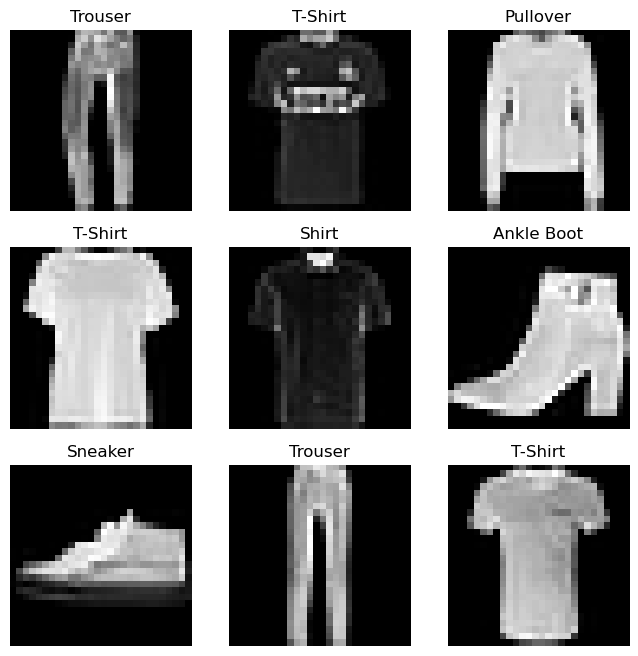

In [7]:
# 我们可以像列表一样手动索引数据集 ：training_data[index]。 我们使用 matplotlib 来可视化训练数据中的一些样本。
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()

## 为文件创建自定义数据集

In [1]:
# 自定义 Dataset 类必须实现三个函数：__init__、__len__ 和 __getitem__。
# 看看这个实现; FashionMNIST图像存储在目录img_dir中，其标签单独存储在CSV文件annotations_file 中。
# 在接下来的部分中，我们将分解每个函数中发生的情况。
import os
import pandas as pd
from torchvision.io import decode_image

Dataset 是 PyTorch 中用于数据集抽象的类。

自定义数据集需要继承 torch.utils.data.Dataset 并重写以下两个方法：

```__len__：```返回数据集的大小。

```__getitem__：```按索引获取一个数据样本及其标签。

In [5]:
import torch
from torch.utils.data import Dataset

# 自定义数据集
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        #按索引返回数据和标签
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

# 生成示例数据
data = torch.randn(100, 5)   # 100 个样本，每个样本有 5 个特征
labels = torch.randint(0, 2, (100,))  # 100 个标签，取值为 0 或 1

# 实例化数据集
dataset = MyDataset(data, labels)

print(f"数据集大小是： {len(dataset)}")
print(f'第八个样本是：{dataset[7]}')
        
        

数据集大小是： 100
第八个样本是：(tensor([-1.2007, -0.4255,  1.4562, -1.2548, -1.0692]), tensor(1))


In [11]:
# DataLoader 是 PyTorch 提供的数据加载器，用于批量加载数据集。

# 提供了以下功能：

# 批量加载：通过设置 batch_size。
# 数据打乱：通过设置 shuffle=True。
# 多线程加速：通过设置 num_workers。
# 迭代访问：方便地按批次访问数据。

from torch.utils.data import DataLoader
# 将上述数据集实例化
dataloader = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=0)

#遍历
for batch_idx, (batch_data, batch_labels) in enumerate(dataloader):
    print(f'批次：{batch_idx + 1}')
    print(f'数据：{batch_data}')
    print(f'标签：{batch_labels}')
    if batch_idx == 3:
        break

批次：1
数据：tensor([[-0.4448,  0.8108,  0.2080,  0.0922,  0.3739],
        [-0.1313, -1.4618, -0.2327, -0.7009, -0.4105],
        [ 0.1749, -1.0233, -0.7142,  0.2773, -1.4503],
        [-0.5527,  0.2623,  0.4059, -0.0526, -1.6546],
        [-0.8892, -0.7628,  0.9573, -0.3709,  0.4418],
        [-1.6734,  0.6425,  0.3851, -0.1421,  0.2552],
        [-0.6288,  0.5267, -0.4534, -0.9066,  0.6567],
        [ 0.0303, -0.5607,  0.2805, -1.4957,  0.2040],
        [ 1.7381,  2.7337,  0.7756,  1.9338,  0.0390],
        [ 0.2608,  0.5314, -0.4371, -0.2576,  0.2604]])
标签：tensor([1, 0, 1, 0, 1, 0, 1, 0, 0, 1])
批次：2
数据：tensor([[-1.7566, -0.3969,  0.8236, -0.1870,  0.2746],
        [-1.2567, -0.6370,  1.7397,  1.6808, -0.4540],
        [-0.1691,  0.5765, -0.9672,  0.5994, -1.5596],
        [-1.1280,  0.8028, -1.4513,  1.1523, -0.8218],
        [-0.3230,  1.1151,  0.1813, -0.8450, -0.6780],
        [ 0.6857, -1.3066,  0.2705, -1.2382,  0.3636],
        [-0.5613,  0.4494,  0.0781,  0.1905, -0.8913],
      

## 加载并查看MNIST数据集

In [20]:
import torchvision
import torchvision.transforms as transforms
# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 标准化
])

# 加载训练数据集
train_dataset = torchvision.datasets.MNIST(
    root='./mnist_data', train=True, transform=transform, download=True)

# 使用 DataLoader 加载数据
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 查看一个批次的数据
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"批次图像大小: {images.shape}")  # 输出形状为 [batch_size, 1, 28, 28]
print(f"批次标签: {labels}")

批次图像大小: torch.Size([32, 1, 28, 28])
批次标签: tensor([6, 0, 7, 1, 5, 3, 7, 3, 4, 4, 6, 3, 0, 7, 3, 1, 6, 2, 8, 6, 1, 8, 6, 7,
        1, 3, 4, 6, 7, 5, 3, 7])


### 将 CSV 文件 作为数据源，并通过自定义 Dataset 和 DataLoader 读取数据。

In [44]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# 自定义CSV数据集
class CSVDataset(Dataset):
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # 使用.iloc明确基于位置索引
        row = self.data.iloc[idx]
        #将特征和标签分开
        features = torch.tensor(row.iloc[:-1].to_numpy(), dtype=torch.float32)   #特征
        label = torch.tensor(row.iloc[-1], dtype=torch.float32)  #标签
        return features, label


# 实例化数据集和DataLoader
dataset = CSVDataset("test_csv_data.csv")
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

#遍历DataLoader
for features, label in dataloader:
    print("features：", features) 
    print("label: ", label)
    
    

features： tensor([[ 0.9000, -0.5000, -1.8000],
        [ 1.0000,  1.1000, -2.0000]])
label:  tensor([0., 0.])
features： tensor([[ 1.5000,  2.2000, -1.1000],
        [-0.3000,  0.8000,  1.2000]])
label:  tensor([0., 0.])
features： tensor([[-0.8000,  0.0000,  0.3000],
        [-2.3000,  0.4000,  0.7000]])
label:  tensor([1., 0.])
features： tensor([[ 1.2000,  2.1000, -3.0000],
        [ 2.1000, -3.3000,  0.0000]])
label:  tensor([1., 1.])
features： tensor([[-1.1000,  0.8000,  1.5000],
        [ 0.5000, -1.2000,  3.3000]])
label:  tensor([1., 1.])


### epoch、 batch 、batch_size 、 epochs的区别是什么？

batch就是数据集分割的份数， batch_size就是每一份数据集的大小。

如下图的csv文件，共有10行数据，每个数据有3个feature, 1个label.
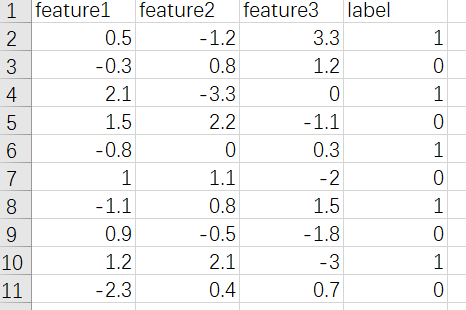

batch_size的大小通常设置为2的n次幂， 如64 128 256等，这主要是充分利用计算机的内存和计算资源

In [51]:
# 实例化数据集和DataLoader,,,将batch_size设置为2   输出5次数据
dataset = CSVDataset("test_csv_data.csv")
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

#遍历DataLoader
for features, label in dataloader:
    print("features：", features) 
    print("label: ", label)

features： tensor([[ 1.5000,  2.2000, -1.1000],
        [-1.1000,  0.8000,  1.5000]])
label:  tensor([0., 1.])
features： tensor([[-0.3000,  0.8000,  1.2000],
        [ 0.9000, -0.5000, -1.8000]])
label:  tensor([0., 0.])
features： tensor([[-0.8000,  0.0000,  0.3000],
        [ 1.2000,  2.1000, -3.0000]])
label:  tensor([1., 1.])
features： tensor([[ 0.5000, -1.2000,  3.3000],
        [-2.3000,  0.4000,  0.7000]])
label:  tensor([1., 0.])
features： tensor([[ 2.1000, -3.3000,  0.0000],
        [ 1.0000,  1.1000, -2.0000]])
label:  tensor([1., 0.])


In [53]:
# 实例化数据集和DataLoader,,,将batch_size设置为5  输出2次数据
dataset = CSVDataset("test_csv_data.csv")
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

#遍历DataLoader
for features, label in dataloader:
    print("features：", features) 
    print("label: ", label)

features： tensor([[ 1.5000,  2.2000, -1.1000],
        [-2.3000,  0.4000,  0.7000],
        [-0.8000,  0.0000,  0.3000],
        [-1.1000,  0.8000,  1.5000],
        [ 0.5000, -1.2000,  3.3000]])
label:  tensor([0., 0., 1., 1., 1.])
features： tensor([[ 0.9000, -0.5000, -1.8000],
        [ 2.1000, -3.3000,  0.0000],
        [-0.3000,  0.8000,  1.2000],
        [ 1.0000,  1.1000, -2.0000],
        [ 1.2000,  2.1000, -3.0000]])
label:  tensor([0., 1., 0., 0., 1.])


In [ ]:
# epochs指的是训练过程中数据被“轮”了多少次， 完整的数据集送入神经网络训练并且返回成为一个epoch
# 通常数据需要训练多轮 epochs就是用来表示完整的数据集总共送入神经网络多少次
# 在每个epoch中模型会遍历整个数据集尽可能的学习到数据集的特征。通常情况下epochs越多，模型训练的效果越好但训练时间也会相应的变长，同时，过多的epochs也会导致模型的过拟合问题
# 简单来说，Epoch是整个训练数据集的遍历次数，Batch_Size是每个批次所包含的样本数量，而Iteration是完成一次Epoch所需的批次数量。
# 三者共同决定了模型的训练过程， 其中 Epoch和Iteration 决定了模型在训练数据上的学习次数 ， 而batch_size 则决定了每次学习所使用的样本数量
# Iteration，即迭代次数，指的是模型在训练过程中完成一次Epoch所需的批次数量。换句话说，Iteration就是模型在整个训练数据集上完成一次遍历所需的步骤数。
# 每完成一次Iteration，模型都会对所有批次的数据进行一次前向传播和一次反向传播，从而更新其权重。
# 在实际应用中，我们通常需要设置足够的Iteration次数，以确保模型能够充分学习数据的内在规律和模式。